# Unit 5 - Financial Planning

In [18]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
from MCForecastTools import MCSimulation

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
#print(os.getcwd())

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD")
my_eth = requests.get('https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD')

response_content = my_btc.content
response_content_2 = my_eth.content

import json

btc_data = my_btc.json()
#print(json.dumps(btc_data, indent=4))

eth_data = my_eth.json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 118110617,
            "total_supply": 118110617,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 4177.48,
                    "volume_24h": 25698198547,
                    "market_cap": 491632991253,
                    "percentage_change_1h": 0.672617651749972,
                    "percentage_change_24h": 4.01566311186276,
                    "percentage_change_7d": 0.176695794582593,
                    "percent_change_1h": 0.672617651749972,
                    "percent_change_24h": 4.01566311186276,
                    "percent_change_7d": 0.176695794582593
                },
                "CAD": {
                    "price": 5160.858792,
                    "volume_24h": 31747554484.9638,
                 

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
my_btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
my_eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
print("current crypto value:",my_btc_value + my_eth_value)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

current crypto value: 65444.479999999996
The current value of your <Response [200]> BTC is $61267.00
The current value of your <Response [200]> ETH is $4177.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

shares_data = {
    "shares": [200, 50]
}

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [10]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]
df_shares = pd.DataFrame(shares_data, index=tickers)
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2021-10-27 00:00:00-04:00  114.66  114.915  114.425  114.77  6817074  456.45   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-27 00:00:00-04:00  457.16  453.86  453.92  48219255

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.77
Current SPY closing price: $453.92


In [12]:
# Compute the current value of shares
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22696.00
The current value of your 200 AGG shares is $22954.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 1200

# Consolidate financial assets data
total_savings = [ my_btc_value + my_eth_value,my_agg_value + my_spy_value]

# Create savings DataFrame
df_savings = pd.DataFrame(total_savings,columns=['Amount'], index=['crypto', 'shares'])
#df_savings = pd.DataFrame(data)
# Display savings DataFrame
df_savings

,Amount
crypto,65444.48
shares,45650.00


<AxesSubplot:ylabel='Amount'>

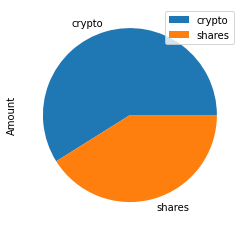

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount')

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amount = float(df_savings.sum())
total_savings_amount
# Validate saving health
#If total savings are greater than the emergency fund, If total savings are equal to the emergency fund, If total savings are less than the emergency fund
if total_savings_amount > emergency_fund:
    print("you're doing great!")
elif total_savings_amount == emergency_fund:
    print("you're fine for now")
else:
    print(f'you are ${(emergency_fund - total_savings_amount)} short')
    

you're doing great!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30,
    weights = [0.4,0.6]
)

In [25]:
# Printing the simulation input data
MC_stock_data.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/holding_cell/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007744,1.005361,1.012835,1.009073,1.003165,1.001662,0.990906,0.991629,0.993976,0.990128,...,1.004551,0.986296,1.002272,0.985698,0.988241,1.018019,0.990431,1.006099,1.023132,0.998569
2,1.013948,0.996585,1.012252,1.002225,1.010993,1.004334,0.993153,0.984726,0.997295,0.992356,...,1.008522,0.991011,1.004081,0.988366,0.981507,1.021065,0.987878,1.018191,1.033326,1.001386
3,1.014695,0.984295,1.000781,1.001424,1.002196,1.003370,0.997359,0.986379,1.003819,0.979221,...,1.005937,0.984811,1.012403,0.992639,0.991835,1.020276,0.988741,1.019975,1.037235,1.001935
4,1.022215,0.992214,1.000369,1.002477,1.014408,0.999624,1.007093,0.981074,1.015596,0.979427,...,1.008635,0.982954,1.008903,0.994030,0.988184,1.015250,0.996251,1.014574,1.055586,1.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.754338,5.300082,22.426956,29.036386,4.991087,28.350112,14.559971,30.133119,15.446116,25.308511,...,59.401908,71.845058,50.900090,18.159263,15.012502,14.625764,29.147349,32.826198,19.017472,25.651488
7557,16.843950,5.267444,22.388694,28.748818,5.009011,28.308618,14.628953,30.219969,15.318728,25.550863,...,59.199069,72.025213,50.816171,18.274494,14.963159,14.811472,29.442982,32.652482,19.092693,25.694535
7558,16.905343,5.366662,22.418209,28.625294,5.054757,28.390261,14.673974,30.432455,15.435981,25.261631,...,58.835214,71.393981,49.795645,17.980676,15.006154,14.668168,29.500187,32.912824,19.093292,25.787561
7559,17.055600,5.328576,22.398219,28.246876,5.044137,28.687835,14.574475,30.422679,15.411796,25.143919,...,58.847816,70.592986,49.781627,17.818056,15.250833,14.517774,29.636242,32.842641,18.965978,25.422936


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

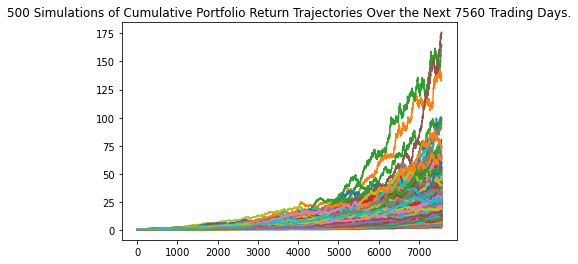

In [30]:
# Plot simulation outcomes
MC_stock_data.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

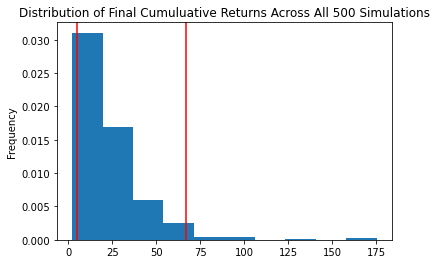

In [31]:
# Plot probability distribution and confidence intervals
MC_stock_data.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stock_data_new = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(MC_stock_data_new)

count           500.000000
mean             23.670537
std              19.515476
min               2.087919
25%              11.147203
50%              18.324692
75%              29.896842
max             175.303424
95% CI Lower      4.579315
95% CI Upper     66.843542
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_stock_data_new[8]*initial_investment,2)
ci_upper = round(MC_stock_data_new[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91586.29 and $1336870.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_stock_data_new[8]*initial_investment,2)
ci_upper = round(MC_stock_data_new[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $137379.44 and $2005306.27


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [41]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [42]:
# Plot simulation outcomes
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/holding_cell/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000123,0.989602,1.002053,1.002898,1.007315,0.996073,1.011949,0.994456,1.002361,1.006646,...,0.993683,1.009495,1.012328,0.990291,0.998572,0.994286,1.003861,0.998305,0.997992,1.003011
2,1.000619,0.995011,0.996588,1.007128,1.005241,0.990343,1.005420,1.000574,1.013980,1.007655,...,0.987881,1.007409,0.999543,0.992708,1.002040,0.988119,1.011501,0.999258,0.999256,1.004865
3,1.009536,1.000615,1.009716,1.004555,1.012065,0.982034,1.009577,0.999897,1.015503,1.007874,...,0.990098,1.010189,0.997712,0.996250,0.998659,0.988172,1.012970,0.999965,0.996732,1.001703
4,1.014123,0.997486,1.008544,1.006703,1.010599,0.987208,1.016913,0.992787,1.023661,0.999931,...,0.997979,1.001131,0.996177,0.996949,0.998188,0.995563,1.016226,0.987038,0.999763,1.002059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.644051,1.323376,1.236095,1.181537,1.122392,1.483293,1.606911,1.237918,1.370893,1.418879,...,1.948911,1.244906,1.160565,1.799626,1.606910,1.776457,1.326414,1.736800,1.401271,1.613768
1257,1.647031,1.326795,1.236548,1.187859,1.125808,1.471630,1.613011,1.247438,1.365789,1.419568,...,1.938777,1.243171,1.169349,1.798917,1.597002,1.769817,1.317612,1.710376,1.410531,1.612263
1258,1.644015,1.329885,1.230079,1.206293,1.133579,1.475898,1.621643,1.252163,1.358552,1.405077,...,1.932399,1.235042,1.167347,1.818079,1.605784,1.767479,1.321992,1.714160,1.415160,1.614675
1259,1.629837,1.327981,1.221426,1.197855,1.134588,1.479334,1.611350,1.249473,1.369079,1.418262,...,1.942782,1.231543,1.173776,1.814183,1.617561,1.756798,1.335141,1.708462,1.415259,1.606815


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

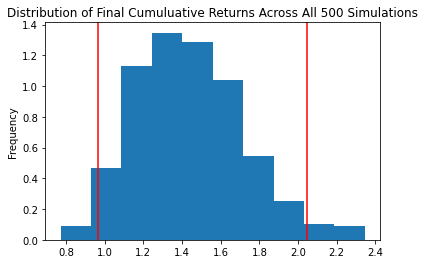

In [43]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()
dist_plot

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.441372
std               0.278930
min               0.771575
25%               1.235180
50%               1.419920
75%               1.622471
max               2.345632
95% CI Lower      0.964018
95% CI Upper      2.044002
Name: 1260, dtype: float64


In [46]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57841.08 and $122640.1


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [52]:
# Plot simulation outcomes
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/holding_cell/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000183,0.991842,1.001940,0.999547,0.996649,1.008798,1.006751,1.009864,1.004633,0.996662,...,0.998809,0.994854,0.995929,0.994944,1.003125,1.007465,0.998326,1.001217,0.993045,1.001306
2,0.998695,0.985239,1.000762,0.996973,1.000640,1.008308,1.013157,1.016376,1.009121,0.995572,...,1.001069,0.989302,0.992631,0.997565,0.998693,1.011429,0.993692,1.012117,1.000082,0.986993
3,0.993155,0.988236,1.009694,0.996606,1.000176,1.007713,1.012127,1.022666,1.003576,0.998014,...,0.999091,0.984061,0.986404,0.999049,0.998574,1.009342,0.998061,1.014687,1.002509,0.992731
4,0.993295,0.987755,1.020371,1.007636,1.005244,1.018025,1.020355,1.017317,1.008858,0.996720,...,1.003184,0.983124,0.981409,1.002561,1.001234,1.011250,1.003014,1.026018,1.009217,0.993864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.242619,2.794875,1.487869,2.198976,2.153787,1.747143,2.903533,1.646933,1.455527,1.477337,...,1.614984,1.313853,1.817165,2.383206,1.767169,1.004436,2.361839,1.615853,1.620887,2.342574
2517,1.240788,2.788256,1.492856,2.207876,2.141929,1.742620,2.895294,1.658019,1.451534,1.470935,...,1.618036,1.315120,1.809235,2.372364,1.766774,1.002279,2.357319,1.624240,1.621575,2.344099
2518,1.248046,2.797886,1.493375,2.205142,2.150541,1.731131,2.892218,1.670774,1.439875,1.475237,...,1.602825,1.312930,1.803741,2.388272,1.785601,0.997313,2.361192,1.625163,1.619185,2.354497
2519,1.260027,2.787312,1.498254,2.222224,2.120166,1.733309,2.912292,1.675042,1.435203,1.479546,...,1.596991,1.294219,1.810138,2.388719,1.775777,1.004118,2.384728,1.641635,1.620019,2.330692


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

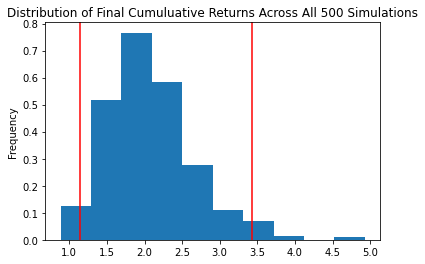

In [53]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()
dist_plot

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.081261
std               0.586816
min               0.883115
25%               1.679595
50%               2.008079
75%               2.417733
max               4.930283
95% CI Lower      1.146421
95% CI Upper      3.428546
Name: 2520, dtype: float64


In [56]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68785.27 and $205712.77
